In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [4]:
!ls

'Best Bowling Economy Innings'	    'Most Fours Innings'
'Best Bowling Strike Rate Innings'  'Most Runs'
'Fastest Centuries'		    'Most Runs Conceded Innings'
'Fastest Fifties'		    'Most Runs Over'
'IPL Anaysis.ipynb'		    'Most Sixes Innings'
'Most Dot Balls Innings'	    'Most Wickets'


In [7]:
most_runs_2021 = pd.read_csv('./Most Runs/Most Runs - 2021.csv')

In [8]:
most_runs_2021.head()

,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1,Ruturaj Gaikwad,16,16,2,635,101*,45.35,466,136.26,1,4,64,23
1,2,Faf du Plessis,16,16,2,633,95*,45.21,458,138.20,0,6,60,23
2,3,KL Rahul,13,13,3,626,98*,62.60,451,138.80,0,6,48,30
3,4,Shikhar Dhawan,16,16,1,587,92,39.13,471,124.62,0,3,63,16
4,5,Glenn Maxwell,15,14,2,513,78,42.75,356,144.10,0,6,48,21


### Top 5 players who remained Notout (minimum 8 innings)

In [18]:
most_runs21_min8inns = most_runs_2021.loc[most_runs_2021.Inns >= 8]

In [34]:
top5_notouts_min8 = pd.DataFrame(most_runs21_min8inns.groupby(['Player','Inns']).sum()['NO']).sort_values('NO',ascending=False).head(5)
top5_notouts_min8

,,NO
Player,Inns,
Ravindra Jadeja,12,9
Shimron Hetmyer,13,6
Dinesh Karthik,15,5
Kieron Pollard,13,5
AB de Villiers,14,4


### Players with Highest Average

In [40]:
most_runs21_min8inns.groupby('Player').mean()['Avg'].sort_values(ascending=False).head(10)

Player
Ravindra Jadeja    75.66
KL Rahul           62.60
Manish Pandey      48.66
Ruturaj Gaikwad    45.35
Faf du Plessis     45.21
Kane Williamson    44.33
Glenn Maxwell      42.75
Venkatesh Iyer     41.11
Sanju Samson       40.33
Mayank Agarwal     40.09
Name: Avg, dtype: float64

### Players with highest strike rates (minimum 150 balls faced)

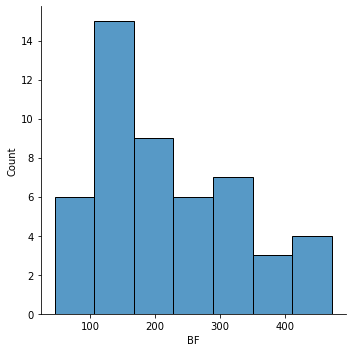

In [71]:
sns.displot(most_runs21_min8inns.BF)
plt.show()

In [76]:
min100_balls = most_runs_2021.loc[most_runs_2021.BF >= 250]
# min100_balls.head()
len(min100_balls)

18

In [78]:
min100_balls.groupby(['Player','Inns','BF','Runs']).mean()['SR'].sort_values(ascending=False).head(10)

Player           Inns  BF   Runs
Prithvi Shaw     15    301  479     159.13
Glenn Maxwell    14    356  513     144.10
Mayank Agarwal   12    314  441     140.44
Rahul Tripathi   16    283  397     140.28
KL Rahul         13    451  626     138.80
Faf du Plessis   16    458  633     138.20
Moeen Ali        15    260  357     137.30
Sanju Samson     14    354  484     136.72
Ruturaj Gaikwad  16    466  635     136.26
Rishabh Pant     16    326  419     128.52
Name: SR, dtype: float64